# Modelling Influenza in a Boarding school using a SIR model
In 1978, an outbreak of influenza occurred in a boarding school located in North England. There were a total of 763 male students within the boarding school who were at risk of being infected. The outbreak reportedly started on the 22nd of January due to one infected boy and lasted until the 4th of Feburary. As a result of the rapid spread, a total of 512 boys out of 763 boys became ill.

Here, the aim is to model the outbreak in the boarding school using a SIR (Susceptible, Infected, Recovered) model which is a simple compartmental model. This will be achieved using through an Agent Based Model (ABM) in Julia.

The data from the boarding school is as follows (see graph) and can be accessed at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1603269/pdf/brmedj00115-0064.pdf.

Markov Process and Chains
=========================

A **probability kernel** is a mapping $K : \mathbb{X} \times {\mathcal{Y}}
\rightarrow \overline{\mathbb{R}}_{+}$ where $(\mathbb{X}, {\mathcal{X}})$ and $(\mathbb{Y},
{\mathcal{Y}})$ are two measurable spaces such that $K(s, \cdot)$ is a
probability measure on ${\mathcal{Y}}$ for all $s \in \mathbb{X}$ and such that
$K(\cdot, A)$ is a measurable function on $\mathbb{X}$ for all $A \in
{\mathcal{Y}}$.

A sequence of random variables $X_{0:T}$ from $(\mathbb{X}, {\mathcal{X}})$  to $(\mathbb{X}, {\mathcal{X}})$
with joint distribution given by

$$
\mathbb{P}_T(X_{0:T} \in {\mathrm d}x_{0:T}) = \mathbb{P}_0(\mathrm{d}x_0)\prod_{s = 1}^T K_s(x_{s - 1}, \mathrm{d}x_s)
$$

where $K_t$ are a sequence of probability kernels is called a (discrete-time) **Markov process**.
The measure so given is a path measure.

Note that, e.g.,

$$
\mathbb{P}_1((X_{0}, X_{1}) \in A_0 \times A_1) = \int_{A_{0} \times A_{1}} \mathbb{P}_0(\mathrm{d}x_0) K_1(x_{0}, \mathrm{d}x_1)
$$

It can be shown that

$$
\mathbb{P}_T(X_t \in \mathrm{d}x_t \,|\, X_{0:t-1} = x_{0:t-1}) = \mathbb{P}_T(X_t \in \mathrm{d}x_t \,|\, X_{t-1} = x_{t-1}) = K_t(x_{t-1} \,|\, \mathrm{d}x_t)
$$

and this is often used as the defintion of a (discrete-time) Markov Process.

Let $(\mathbb{X}, \mathcal{X})$ and $(\mathbb{Y}, \mathcal{Y})$ be two measure (actually Polish) spaces.
We define a hidden Markov model as a $(\mathbb{X} \times \mathbb{Y}, X \otimes \mathcal{Y})$-measurable
Markov process $\left(X_{n}, Y_{n}\right)_{n \geq 0}$ whose joint distribution is given by

$$
\mathbb{P}_T(X_{0:T} \in {\mathrm d}x_{0:T}, Y_{0:T} \in {\mathrm d}y_{0:T}) = \mathbb{P}_0(\mathrm{d}x_0)F_s(x_{0}, \mathrm{d}y_0)\prod_{s = 1}^T K_s(x_{s - 1}, \mathrm{d}x_s) F_s(x_{s}, \mathrm{d}y_s)
$$

Writing $\mathbb{Q}_0(\mathrm{d}x_0, \mathrm{d}y_0) = \mathbb{P}_0(\mathrm{d}x_0) F_0(x_0, \mathrm{d}y_0)$ and $L _t((x_{t-1}, y_{t-1}), (\mathrm{d}x_t, \mathrm{d}y_t)) = K_t(x_{t - 1}, \mathrm{d}x_t) F_t(x_{t}, \mathrm{d}y_t)$ we see that this is really is a Markov process:

$$
\mathbb{P}_T(X_{0:T} \in {\mathrm d}x_{0:T}, Y_{0:T} \in {\mathrm d}y_{0:T}) = \mathbb{P}_0(\mathrm{d}x_0)F_0(x_0, \mathrm{d}y_0)\prod_{s = 1}^T K_s(x_{s - 1}, \mathrm{d}x_s) F_s(x_{s}, \mathrm{d}y_s) = \mathbb{Q}_0(\mathrm{d}x_0, \mathrm{d}y_0)\prod_{s = 1}^T L_s((x_{s - 1}, y_{s - 1}), (\mathrm{d}x_s, \mathrm{d}y_s))
$$

We make the usual assumption that

$$
F_t(x_t, \mathrm{d}y_t) = f_t(x_t, y_t) \nu(\mathrm{d}y)
$$

We can marginalise out $X_{0:T}$:

$$
\mathbb{P}_T(Y_{0:t} \in \mathrm{d}y_{0:t}) = \mathbb{E}_{\mathbb{P}_t}\Bigg[\prod_{s=0}^t f_s(X_s, y_s)\Bigg]\prod_{s=0}^t\nu(\mathrm{d}y_s)
$$

And writing

$$
p_T(y_{0:t}) = p_t(y_{0:t}) = \mathbb{E}_{\mathbb{P}_t}\Bigg[\prod_{s=0}^t f_s(X_s, y_s)\Bigg]
$$

We can write

$$
\mathbb{P}_t(X_{0:t} \in \mathrm{d}x_{0:t} \,|\, Y_{0:t} = y_{0:t}) = \frac{1}{p_t(y_{0:t})}\Bigg[\prod_{s=0}^t f(x_s, y_s)\Bigg]\mathbb{P}_t(\mathrm{d}_{0:t})
$$

$$
\mathbb{P}_{t-1}\left(X_{t} \in \mathrm{d} x_{t} \mid Y_{0: t-1}=y_{0: t-1}\right)
=\int_{\mathcal{X}} P_{t}\left(x_{t-1}, \mathrm{~d} x_{t}\right) \mathbb{P}_{t}\left(X_{t-1} \in \mathrm{d} x_{t-1} \mid Y_{0: t-1}=y_{0: t-1}\right)
$$

$$
(\mathrm{P} \rho) f \triangleq \int \rho(\mathrm{d}x)K\left(x, \mathrm{d}x^{\prime}\right)f\left(x^{\prime}\right)
$$


$$
\pi_n = {\mathcal F}_n \pi_{n-1} = {\mathcal C}_n{\mathcal P}\pi_{n-1}
$$

$$
{\mathcal P} \mu = \mu P
$$

$$
({\mathcal C}_n \mu)(A)
$$

$$
{\mathcal S}^N \mu = \frac{1}{N}\sum_{k=1}^N \delta_{X_k}, X_k {\text iid} \iso \mu
$$

In [1]:
#dependencies for this model
using Agents, Random, DataFrames, LightGraphs
using Distributions
using DrWatson: @dict
using Plots
using Random
using InteractiveDynamics
using CairoMakie
using BlackBoxOptim, Random
using Statistics: mean
using Gadfly
using LinearAlgebra
using ColorBrewer
using Compose
using Gtk

# If needed, the packages can be installed through using the command:
#import Pkg; Pkg.add("StatsPlots")


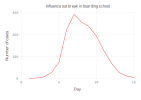

In [2]:
#time steps vector - shows 15 days
step_vec = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#number of students infected
actual_data = [1, 3, 8, 28, 76, 222, 293, 257, 237, 192, 126, 70, 28, 12, 5]

#Plot
Gadfly.plot(x = step_vec, y = actual_data, Geom.line, Gadfly.Theme(default_color=color("red")),
            Guide.XLabel("Day"),
            Guide.YLabel("Number of cases"),
            Guide.Title("Influenza outbreak in boarding school"))


# ABM using Agents.jl

Agents.jl is a Julia framework for ABM and here, it is used to create the overarching model. First, we intialise a constant which is the number of students intially at risk:


In [3]:
#Number of students initally at risk
num_students = 763

763

### Agent type
As part of the Agents.jl documentation, an agent type must be created intially. Here we create an agent of type Student which is of type AbstractAgent (default). The Student has an id (required) and a status - which for our model will be either susceptible, infected or recovered. It must also be noted that while a space for the ABM can be created, here it is not used.

In [4]:
#Agent type
mutable struct Student <: AbstractAgent
    id::Int
    status::Symbol  # 1: S, 2: I, 3:R
end

### Creating the initial model
To create the ABM, a helper function (init_model) which intakes parameters of the model can be defined. The parameters are as follows:

    β #"rate" of infection
    c #contact rate
    γ # "rate" of recovery 
    N #number of students in boarding school
    IO #initial number of infected 

The intaken parameters of β,c and γ are then mapped to be properties of the model (to allow them to be accessed through using model.β or model.γ). 

These properties, as well as the initial agent type, can then used to create an ABM. To populate the ABM, we loop through all N students, classify them as infected (until IO or the initial number of infected is reached) or suspectible (everyone else) and then use add_agent! to add the agent (Student) to the ABM. 


In [5]:
function init_model(β :: Float64, c :: Float64, γ :: Float64, N :: Int64, I0 :: Int64)
    properties = @dict(β,c,γ)
    model = ABM(Student; properties=properties)
    for i in 1 : N #for all students
        if i <= I0 # infect initial number of students
            s = :I
        else
            s = :S # rest of students are susceptible
        end
        p = Student(i,s) #create student agent type
        p = add_agent!(p,model) #add this student to ABM
    end
    return model
end;


### Agent step function
The next step in creating an ABM is to create an agent step function that will define how all individual agents will evolve over time. Here, in this agent step function, we call two helper functions that will simulate the transmit and recover steps for the flu model. 

In [6]:
function agent_step!(agent, model)
    transmit!(agent, model)
    recover!(agent, model)
end;

### Transmisson step of agent_step!
In this agent based model, the transmission occurs based on if the agent is suspectible or not. If the agent is not susceptible (instead infected or recovered), then this function returns (as they cannot be infected again). 

Otherwise, a number of contacts (determined from a Poisson distribution of the rate of contact) is calculated. For each of these contacts, a random agent - who represents this contact - is determined. If this random agent is infected and β is greater than or equal to a randomised value, then the initial agent (who was initially susceptible) becomes infected. 


In [7]:
function transmit!(agent, model)
    # If I'm not susceptible, I return
    agent.status != :S && return
    #based on c value, decide contacts
    ncontacts = rand(Poisson(model.properties[:c]))
    for i in 1:ncontacts
        # Choose random individual
        alter = random_agent(model)
        # if random agent is infected, and rand is <=
        # beta (infection rate)
        if alter.status == :I && (rand() ≤ model.properties[:β])
            # An infection occurs
            agent.status = :I
            break
        end
    end
end;

### Recovery step of agent_step!
To ensure that recovery in the ABM occurs only if agent is infected, the recover! function returns if the current status of the agent is either susceptible or recovered. Otherwise, the infected agent recovers based on if γ (recovery rate) is greater than or equal to a random value. 

In [8]:
function recover!(agent, model)
    #if agent is not infected, then returns
    agent.status != :I && return
    #if random probability of recovery <= gamma
    if rand() ≤ model.properties[:γ]
        #then recover agent
            agent.status = :R
    end
end;

### Helper functions to calculate amount of S,I,R
We also define some helper functions that calculate the amount of Susceptible, Infected, Recovered agents (Students) in the model.

In [9]:
susceptible(x) = count(i == :S for i in x)
infected(x) = count(i == :I for i in x)
recovered(x) = count(i == :R for i in x);


We also define another helper function for the next section

In [19]:
function rate_to_proportion(r::Float64,t::Float64)
    #rate based on 1-e^(-r*t)
    1-exp(-r*t)
end;

# Defining parameters of model
To run the model, firstly the parameters for the initial model must be defined (to input into init_model). In this model, we determine the contact rate (c) and γ based on change in time step variable (δt). β, N and IO are assumed, constastingly, to be set values (determined through trial and error). The specific values are as follows:

In [20]:
δt = 0.1 #change in time
β = 0.25 #rate of infection
c = 7.5 * δt #contact rate
γ = rate_to_proportion(0.50, δt); #rate of recovery
N = 763 #total number of students
I0 = 1; #one person infected initially

We also define the number of steps at 150 as 0.1*150 = 15 time steps in total (time period of boarding school data), which is required later when running the ABM. For plotting later, a time vector is also defined.

In [21]:
nsteps = 150 #number of steps
tf = nsteps * δt #t final
t = 0 : δt : tf; #time vector

# Running the ABM
To run the ABM, we first create the model using the parameters defined previously and define the data to be collected from both the agents and model. Here, we intend to collect the number of agents (or adata) who are susceptible, infected and recovered at each time step, hence we define this as data vector (to_collect).

These data vectors and the created model can then be passed into run! function. The total number of time steps (nsteps) is also passed in. 

Finally, we also append the resulting abm_data with a time step/value for plotting. 

In [22]:
Random.seed!(1234);
#create model
abm_model = init_model(β, c, γ, N, I0)

#collect data
to_collect = [(:status, f) for f in (susceptible, infected, recovered)]
abm_data, _ = run!(abm_model, agent_step!, nsteps; adata = to_collect);

#time step information
abm_data[!,:t] = t;

# Plotting results
The result of this can then be plotted against the actual data.

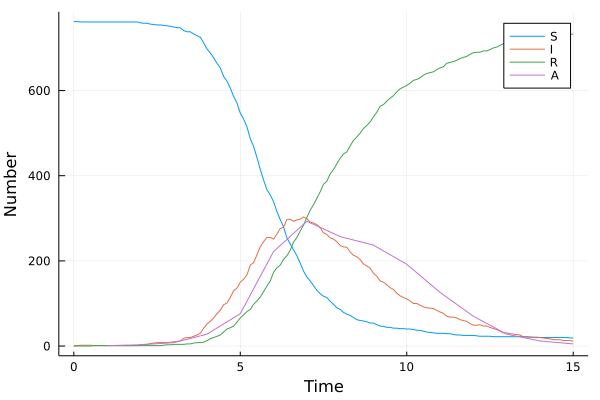

In [23]:
actuals = [1, 3, 8, 28, 76, 222, 293, 257, 237, 192, 126, 70, 28, 12, 5]
Plots.plot(t,abm_data[:,2],label="S",xlab="Time",ylabel="Number")
Plots.plot!(t,abm_data[:,3],label="I")
Plots.plot!(t,abm_data[:,4],label="R")
Plots.plot!(1:15, actuals, label="A")

## Running the model 50 times
To assess the perfomance of the model in modelling the trend shown in the boarding school data, the model can be initialised and run 50 times with the same parameters used above.

In [24]:
#define the model
model_1 = init_model(β, c, γ, N, I0);
#initial run (or the 1st run)
agent_50_df, _ = run!(model_1, agent_step!, nsteps; adata = to_collect);
#define time vector
agent_50_df[!,:t] = t;
#create an overall data frame for all 50 trials and assign the 
# number of infected data (in column 3) to the first column.
a_50 = agent_50_df[:,3];


#repeat process 49 times
for i in 2:50
    model_2 = init_model(β, c, γ, N, I0)
    agent_df_2, _ = run!(model_2,agent_step!,nsteps; adata = to_collect);
    a_1 = agent_df_2[:,3];
    #append results to global a_50 data frame
    global a_50 = [a_50 a_1]
end


### Plotting the results of running the model 50 times
The results from doing this can be found below:

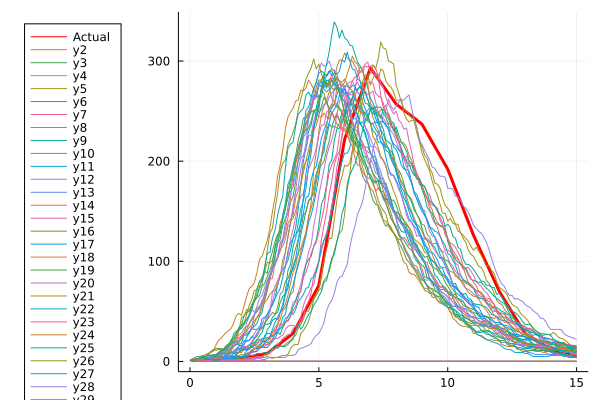

In [25]:
Plots.plot(1:15, actuals, label="Actual", color = "red", lw = 3, legend = :outertopleft)
for i in 1:49
    Plots.plot!(t, a_50[:,i])#, seriestype = :scatter)
end
Plots.plot!(t,a_50[:,50])

Additionally, we can also plot the mean, median and std to further understand the performance of the ABM.

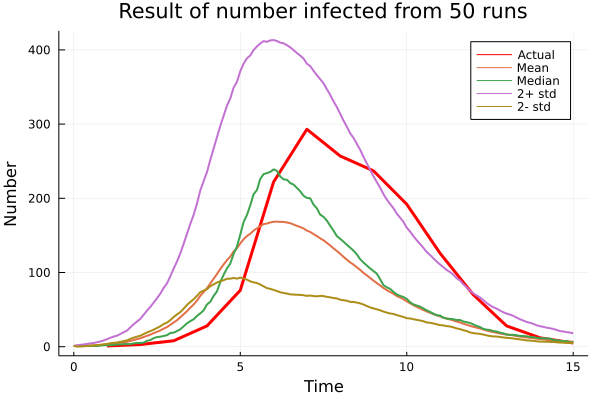

In [26]:
mean_of_50 = mean(a_50, dims = 2)
median_of_50 = median(a_50, dims = 2)
std_of_50 = std(a_50, dims = 2)

Plots.plot(1:15, actuals, label="Actual", color = "red", lw = 3, title = "Result of number infected from 50 runs", xlab="Time",ylabel="Number")
Plots.plot!(t, mean_of_50, label = "Mean", lw = 2)
Plots.plot!(t, median_of_50, label = "Median", lw = 2)
Plots.plot!(t, 2*std_of_50 + mean_of_50, label = "2+ std", lw = 2)
Plots.plot!(t, abs.(mean_of_50 - 2*std_of_50) , label = "2- std", lw = 2)

# Particle Filter
From the above simulations, it was evident that β, γ and c were estimated to be 2,0.5 and 0.75 respectively. However, a particle filter can be used to estimate these parameters and thus generate a trend that is more likely to model the behaviour observed in the original boarding school data. 

## Helper function to determine amount of S, I, R in model
As this SIR model evolves based on agent stepping, the 'particles' in this case will be different abm models (with slight variation in parameters). Due to this, we require a function that intakes a model and returns the current amount of S,I and R. This function is defined as follows:


In [27]:
function modelCounts(abm_model)
    nS = 0.0
    nI = 0.0
    nR = 0.0
    num_students = 763
    for i in 1:num_students
        status = get!(abm_model.agents, i, undef).status;
        if status == :S
            nS = nS + 1
        elseif status == :I
            nI = nI + 1
        else
            nR = nR + 1
        end
    end
    return nS, nI, nR
end

modelCounts (generic function with 1 method)

## Input parameters for particle filter
The particle filter requires various inputs to acurately model the particles. The inputs required for the particle filter (function pf - see below) are defined as:

    # inits - initial abm models 
    # N - number of particles (or models)
    # y is the data - specifically, this is the number of infected for each of the 14 days
    # Q is the covariance matrix - To avoid particle collapse we need to perturb the parameters we do this by sampling from a multivariate normal distribution.
    # R is the observation covariance matrix
    
As per these requirements, these variables can be defined as follows:

In [28]:
Qbeta  = 1.0e-6 #covariance for β
Qc     = 5.0e-7 #covariance for c
Qgamma = 5.0e-7 #covariance for γ

# Parameter update covariace aka parameter diffusivity
Q = [Qbeta 0.00 0.00; 0.0 Qc 0.0; 0.0 0.0 Qgamma];

# Observation covariance
R = Matrix{Float64}(undef,1,1); 
R[1,1] = 0.1;
# Number of particles
P = 50;

#creates P models with some variation in the params
inits = [init_model(rand(LogNormal(log(β), Qbeta)), rand(LogNormal(log(c), Qc)), rand(LogNormal(log(γ), Qgamma)),
        N, 1) for n in 1:P]


50-element Vector{AgentBasedModel{Nothing, Student, typeof(Agents.Schedulers.fastest), Dict{Symbol, Float64}, MersenneTwister}}:
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: fastest
 properties: γ, c, β
 AgentBasedModel with 763 agents of type Student
 no space
 scheduler: 

## Resampling function
Additionally, we also define the following function that resamples the models based on their weights (which will be derived from the pf)

In [29]:
function resample_stratified(weights)

    N = length(weights)
    # make N subdivisions, and chose a random position within each one
    positions =  (rand(N) + collect(range(0, N - 1, length = N))) / N

    indexes = zeros(Int64, N)
    cumulative_sum = cumsum(weights)
    i, j = 1, 1
    while i <= N
        if positions[i] < cumulative_sum[j]
            indexes[i] = j
            i += 1
        else
            j += 1
        end
    end
    return indexes
end

resample_stratified (generic function with 1 method)

## Particle filter function - not too sure about this section 
The particle filter function essentially runs for a specified number of time steps (15 days here) and conducts the following steps for when t > 1:
1. Resamples the particles (models) based on the weights (determined at each time step)
2. Selects the inits models based on index determined from resampling 
3. Update each of the models by 1 time step (here 10 is specified as input as 0.1x10 = 1 time step)
4. Record current number of infected within models
5. Diter the parameters for each particle (or model)

Furthermore, for all time steps, the following step is undertaken:
- Determine weights of models based on comparison with actual data 


In [30]:
function pf(inits, N, y, Q, R)

    T = length(y)
    log_w = zeros(T,N);
    y_pf = zeros(T,N);
    y_pf[1,:] = map(x -> x[2], map(modelCounts, inits))
    wn = zeros(N);

    for t = 1:T
        if t >= 2
            a = resample_stratified(wn);
            print("a = ", a, "\n")

            inits = inits[a]
            for i in 1:N
                Agents.step!(inits[i], agent_step!, 10)
                currS, currI, currR = modelCounts(inits[i])
                # print("props = ", inits[i].properties, " currS = ", currS, " currI = ", currI, " currR = ", currR, "\n")
                y_pf[t,i] = currI
            end

            epsilons = rand(MvNormal(zeros(3), Q), N)
            for i in 1:N
                inits[i].properties[:β] = exp(log(inits[i].properties[:β]) + epsilons[1,i])
                inits[i].properties[:c] = exp(log(inits[i].properties[:c]) + epsilons[2,i])
                inits[i].properties[:γ] = exp(log(inits[i].properties[:γ]) + epsilons[3,i])
            end
        end

        print("y[", t, "] = ", y[t], "\n")
        for i in 1:N
            print("y_pf[",t,",",i,"] = ", y_pf[t, i], "\n")
        end

        log_w[t, :] = map(x -> logpdf(MvNormal([y[t]], R), x), map(x -> [x], y_pf[t, :]))

        # To avoid underflow subtract the maximum before moving from
        # log space
        wn = map(x -> exp(x), log_w[t, :] .- maximum(log_w[t, :]));
        wn = wn / sum(wn);
        print("wn = ", wn, "\n")
    end

    log_W = sum(map(log, map(x -> x / N, sum(map(exp, log_w[1:T, :]), dims=2))));

    return(y_pf, log_w, log_W)

end


pf (generic function with 1 method)

# Result of particle filter 
The end result of running the pf should be ideally be the number of infected for each of the models over the 14 days which accurately models the trend depicted in the boarding school data. However, due to particle filter collapse (see https://arxiv.org/abs/1405.4081) the following particle filter code does not produce the expected results.

In [31]:
(end_states, bar, baz) = pf(inits, P, map(x -> convert(Float64,x), actuals), Q, R);

y[1] = 1.0
y_pf[1,1] = 1.0
y_pf[1,2] = 1.0
y_pf[1,3] = 1.0
y_pf[1,4] = 1.0
y_pf[1,5] = 1.0
y_pf[1,6] = 1.0
y_pf[1,7] = 1.0
y_pf[1,8] = 1.0
y_pf[1,9] = 1.0
y_pf[1,10] = 1.0
y_pf[1,11] = 1.0
y_pf[1,12] = 1.0
y_pf[1,13] = 1.0
y_pf[1,14] = 1.0
y_pf[1,15] = 1.0
y_pf[1,16] = 1.0
y_pf[1,17] = 1.0
y_pf[1,18] = 1.0
y_pf[1,19] = 1.0
y_pf[1,20] = 1.0
y_pf[1,21] = 1.0
y_pf[1,22] = 1.0
y_pf[1,23] = 1.0
y_pf[1,24] = 1.0
y_pf[1,25] = 1.0
y_pf[1,26] = 1.0
y_pf[1,27] = 1.0
y_pf[1,28] = 1.0
y_pf[1,29] = 1.0
y_pf[1,30] = 1.0
y_pf[1,31] = 1.0
y_pf[1,32] = 1.0
y_pf[1,33] = 1.0
y_pf[1,34] = 1.0
y_pf[1,35] = 1.0
y_pf[1,36] = 1.0
y_pf[1,37] = 1.0
y_pf[1,38] = 1.0
y_pf[1,39] = 1.0
y_pf[1,40] = 1.0
y_pf[1,41] = 1.0
y_pf[1,42] = 1.0
y_pf[1,43] = 1.0
y_pf[1,44] = 1.0
y_pf[1,45] = 1.0
y_pf[1,46] = 1.0
y_pf[1,47] = 1.0
y_pf[1,48] = 1.0
y_pf[1,49] = 1.0
y_pf[1,50] = 1.0
wn = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02

y[7] = 293.0
y_pf[7,1] = 0.0
y_pf[7,2] = 0.0
y_pf[7,3] = 0.0
y_pf[7,4] = 0.0
y_pf[7,5] = 0.0
y_pf[7,6] = 0.0
y_pf[7,7] = 0.0
y_pf[7,8] = 0.0
y_pf[7,9] = 0.0
y_pf[7,10] = 0.0
y_pf[7,11] = 0.0
y_pf[7,12] = 0.0
y_pf[7,13] = 0.0
y_pf[7,14] = 0.0
y_pf[7,15] = 0.0
y_pf[7,16] = 0.0
y_pf[7,17] = 0.0
y_pf[7,18] = 0.0
y_pf[7,19] = 0.0
y_pf[7,20] = 0.0
y_pf[7,21] = 0.0
y_pf[7,22] = 0.0
y_pf[7,23] = 0.0
y_pf[7,24] = 0.0
y_pf[7,25] = 0.0
y_pf[7,26] = 0.0
y_pf[7,27] = 0.0
y_pf[7,28] = 0.0
y_pf[7,29] = 0.0
y_pf[7,30] = 0.0
y_pf[7,31] = 0.0
y_pf[7,32] = 0.0
y_pf[7,33] = 0.0
y_pf[7,34] = 0.0
y_pf[7,35] = 0.0
y_pf[7,36] = 0.0
y_pf[7,37] = 0.0
y_pf[7,38] = 0.0
y_pf[7,39] = 0.0
y_pf[7,40] = 0.0
y_pf[7,41] = 0.0
y_pf[7,42] = 0.0
y_pf[7,43] = 0.0
y_pf[7,44] = 0.0
y_pf[7,45] = 0.0
y_pf[7,46] = 0.0
y_pf[7,47] = 0.0
y_pf[7,48] = 0.0
y_pf[7,49] = 0.0
y_pf[7,50] = 0.0
wn = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.

y[13] = 28.0
y_pf[13,1] = 0.0
y_pf[13,2] = 0.0
y_pf[13,3] = 0.0
y_pf[13,4] = 0.0
y_pf[13,5] = 0.0
y_pf[13,6] = 0.0
y_pf[13,7] = 0.0
y_pf[13,8] = 0.0
y_pf[13,9] = 0.0
y_pf[13,10] = 0.0
y_pf[13,11] = 0.0
y_pf[13,12] = 0.0
y_pf[13,13] = 0.0
y_pf[13,14] = 0.0
y_pf[13,15] = 0.0
y_pf[13,16] = 0.0
y_pf[13,17] = 0.0
y_pf[13,18] = 0.0
y_pf[13,19] = 0.0
y_pf[13,20] = 0.0
y_pf[13,21] = 0.0
y_pf[13,22] = 0.0
y_pf[13,23] = 0.0
y_pf[13,24] = 0.0
y_pf[13,25] = 0.0
y_pf[13,26] = 0.0
y_pf[13,27] = 0.0
y_pf[13,28] = 0.0
y_pf[13,29] = 0.0
y_pf[13,30] = 0.0
y_pf[13,31] = 0.0
y_pf[13,32] = 0.0
y_pf[13,33] = 0.0
y_pf[13,34] = 0.0
y_pf[13,35] = 0.0
y_pf[13,36] = 0.0
y_pf[13,37] = 0.0
y_pf[13,38] = 0.0
y_pf[13,39] = 0.0
y_pf[13,40] = 0.0
y_pf[13,41] = 0.0
y_pf[13,42] = 0.0
y_pf[13,43] = 0.0
y_pf[13,44] = 0.0
y_pf[13,45] = 0.0
y_pf[13,46] = 0.0
y_pf[13,47] = 0.0
y_pf[13,48] = 0.0
y_pf[13,49] = 0.0
y_pf[13,50] = 0.0
wn = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 